# Homework 03

### Brown University  
### DATA 1010  
### Fall 2020

## Problem 1

In this problem we'll explore the Lagrange multipliers method used to discover the extrema of a smooth function $f$ whose domain is a strict subset of $\mathbb{R}^n$. 

(a) Write down conditions on the first derivative (the gradient) of $f$ and conditions on the second derivative (the Hessian) of $f$ that must be satisfied at any local extremum of $f$, and explain briefly why they are necessarily satisfied. (Your written solution may follow the presentation in DG, but it should be in your own words.) You may assume that the boundary of the domain of $f$ is the 0-level set of a differentiable function $g$ with nonvanishing gradient. 

*Hint: The second-order condition at the boundary will require some new thoughts. You'll need to think about how the Hessian specifies which directions you can go from a critical point to increase/decrease the function.*

In the standard derivation, the multiplier $\lambda$ arises as an equation-solving convenience. However, it can be given an interpretation in the context of the constrained optimization problem. 

(b) Using the example $f(\mathbf{x}) = 3x_1 + 4x_2$ and $g(\mathbf{x}) = x_1^2 + x_2^2 - 1$, find the extrema and the values of $\lambda$ at those points.

(c) At this point, find the gradient of both $f(x)$ and $g(x)$, are these two gradients linearly dependent? If so, what is the multiplier relating these two gradients? Describe what $\lambda$ represents. (Hint: think about replacing the constraint equation $g(x) = 0$ with $g(x) = c$ for some small value of $c$.)

Here's an interactive graph to help you visualize what's going on:

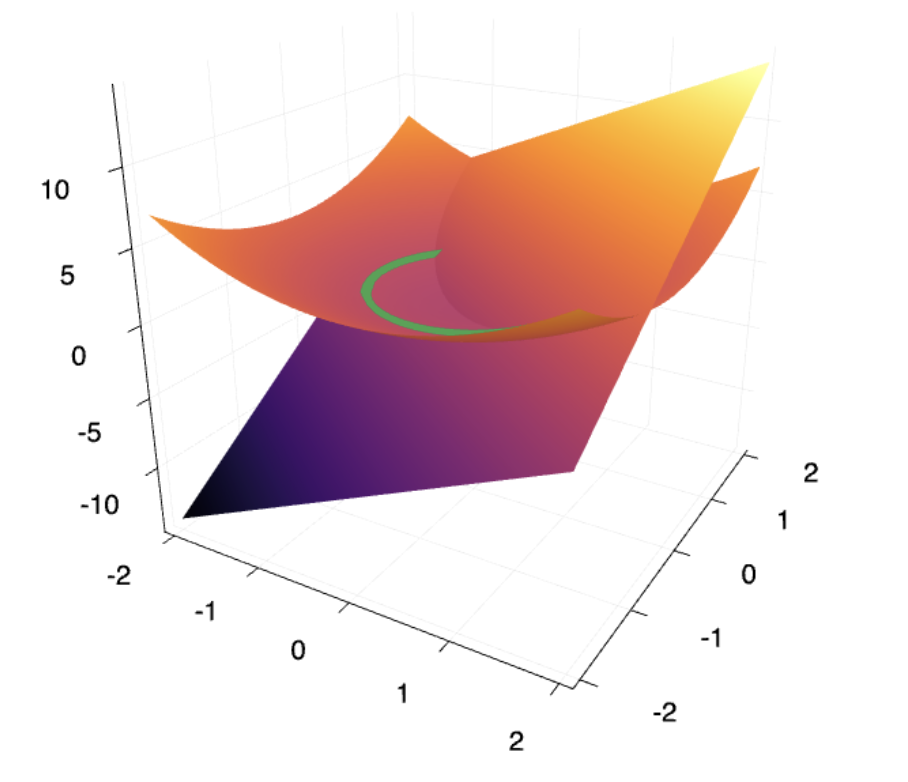

In [1]:
using Plots
plotlyjs()
f(x) = 3x[1] + 4x[2]
g(x) = x[1]^2 + x[2]^2 - 1
surface(-2:0.1:2, -2:0.1:2, (x₁,x₂) -> f([x₁,x₂]))
surface!(-2:0.1:2, -2:0.1:2, (x₁,x₂) -> g([x₁,x₂]))
θs = LinRange(0, 2π, 100) 
path3d!(cos.(θs), sin.(θs), fill(0.1,length(θs)), linewidth = 8)

<!DOCTYPE html>
 
 
 Plots.jl

## Problem 2

We would like to examine the details of matrix differentiation in this problem. Let's say that $\mathbf{x} = [x_1, x_2, x_3]$ and 
$$A = \left[\begin{matrix} 1 & 2 & 0 \\ 2 & 1 & 0 \\ 0 & 1 & 1 \end{matrix}\right]$$

(a) Given an $\mathbb{R}^3$-valued function $\mathbf{a}$ of a vector $\mathbf{x}$ in $\mathbb{R}^3$, recall that the derivative of $\mathbf{a}$ with respect to $\mathbf{x}$ is 
$$
\frac{\partial \mathbf{a}}{\partial \mathbf{x}} = 
\left(\begin{matrix}
\frac{\partial a_1}{\partial x_1} & \frac{\partial a_1}{\partial x_2} & \frac{\partial a_1}{\partial x_3} \\
\frac{\partial a_2}{\partial x_1} & \frac{\partial a_2}{\partial x_2} & \frac{\partial a_2}{\partial x_3} \\
\frac{\partial a_3}{\partial x_1} & \frac{\partial a_3}{\partial x_2} & \frac{\partial a_3}{\partial x_3}
\end{matrix}\right)
$$
where $\mathbf{a} = [a_1, a_2, a_3]$, $\mathbf{x} = [x_1, x_2, x_3]$.

Using this definition, find $\frac{\partial (A\mathbf{x})}{\partial \mathbf{x}}$ and show that it is equal to the matrix $A$.

(b) Similarly, the derivative of a real-valued function with respect to a vector in $\mathbb{R}^3$ is
$$\frac{\partial a}{\partial \mathbf{x}} = \left[\begin{array}{ccc} \frac{\partial a}{\partial x_1} & \frac{\partial a}{\partial x_2} & \frac{\partial a}{\partial x_3}\end{array}\right],$$ where $\mathbf{x} = (x_1, x_2, x_3)$

Using this definition, find $\mathbf{x}'A\mathbf{x}$, then find $\frac{\partial \mathbf{x}'A\mathbf{x}}{\partial \mathbf{x}}$, and show that it is equal to $\mathbf{x}'(A + A')$.

## Problem 3

In class, we differentiated the function $x \mapsto \exp(\cos^2(x))$ at the point $x = \pi/4$ "autodiff-style", meaning that we substituted as soon as possible in our function evaluations and derivative calculations, so that we could have nothing but functions and numbers the whole way through. In other words, we avoided having to represent any symbolic expressions in the computation. This is what it looks like drawn out in a diagram, with derivative values in purple and function values in green:

<img src="chain-rule-autodiff.svg" width="80%">

In this problem, we're going to do the same thing but with matrix derivatives in place of the single-variable derivatives. 

Consider the function $f(\mathbf{x}) = [\sigma(x_1), \sigma(x_2), \sigma(x_3)]$, where $\sigma(x) = \frac{1}{1 + \exp(-x)}$. Let $A = \left[\begin{matrix} 1 & 2 & 0 \\ 3 & -2 & 1 \\ 0 & 3 & 2 \end{matrix}\right]$ and $B = \left[\begin{matrix} 4 & -1 & 2 \\ 0 & 0 & 2 \\ 3 & 0 & 0 \end{matrix}\right]$. Differentiate the function $\mathbf{x} \mapsto Bf(A\mathbf{x})$ with respect to $\mathbf{x}$ at the point $\mathbf{x} = [-1, 0, 2]$, using a diagram as similar as possible to the one above. Actually, it should be exactly the same, [mutatis mutandis](https://en.wikipedia.org/wiki/Mutatis_mutandis). 

Notes: 
1. The function we're differentiating here is a composition of the functions "multiply by $B$", f, and "multiply by $A$".
2. To make life easier, feel free to take the equation $\frac{d\sigma}{dx} = \frac{e^{- x}}{\left(1 + e^{- x}\right)^{2}}$ as given.
3. This function is not only related to neural networks, it **is** a neural network. Differentiating (specifically using this autodifferentiation technique) is how we train neural networks.
4. Also, feel free to evaluate each expression numerically or exactly, as you prefer.
5. Here's some code to help get you started:

In [2]:
A = [1 2 0; 3 -2 1; 0 3 2]
B = [4 -1 2; 0 0 2; 3 0 0]
x = [-1, 0, 2] 
# σ(x) = 1/(1 + 1/sympy.exp(-x)) # exact approach
# σ(x) = 1/(1 + 1/exp(-x))  # numerical approach

3-element Array{Int64,1}:
 -1
  0
  2

## Problem 4

Given a square matrix $A$, its matrix exponential $\exp(A)$ is defined to be $I + A + \frac12A^2 + \frac16A^3 + \cdots$. In other languages, the function `exp` exponentiates a matrix entry-by-entry, while the matrix exponential is a different function, like `expm`. In Julia, `exp` computes the matrix exponential, while `exp.` is the component-wise version: 

In [3]:
A = [1 2; 3 4]
println(exp(A))
println(exp.(A))

[51.968956198705044 74.73656456700328; 112.10484685050491 164.07380304920997]
[2.718281828459045 7.38905609893065; 20.085536923187668 54.598150033144236]


(a) Numerically investigate the claim that the derivative of $\exp(tA)$ with respect to $t \in \mathbb{R}$ is $A\exp(tA)$. Or should it be $\exp(tA)A$?

Note 1: the derivative of a matix-valued function of a real variable is defined entry-by-entry. 

Note 2: "Numerically investigate" just means "make up a few small examples and see if the results you get for those examples make sense". You can use difference quotients to approximate derivatives. Even though that method loses a lot of precision, it's fine because you're just doing an approximate check anyway.  

(b) Numerically investigate the claim that if $A$ is diagonalizable as $V D V^{-1}$, then the matrix exponential can be calcluated as $V \exp.(D) V^{-1}$.  In other words, the idea is that you can matrix exponentiate by diagonalizing and applying the exponential function entry-wise to the diagonal matrix.

*Solution.* 

## Problem 5

In this problem, we're going to look at a couple virtues of having the `Int8` and `Int64` data types "wrap around" from $2^n-1$ to $-2^n$ (for $n = 8$ and $n = 64$, respectively).

(a) Use ordinary, by-hand arithmetic to add the binary numbers `00011011` and `00000101`. 

*Hint: this is exactly like decimal addition, with place-value and carrying and all that, but with 2 in place of 10.*

(b) Now apply the same, by-hand algorithm to add the Int8 numbers `00000011` and `11111001`. Does the algorithm yield the correct result, despite the second number being negative? 

(c) Julia, like many languages, includes *bitshift* operators. As the name suggests, these operators shift a value's underlying bits over a specified number of positions:

In [4]:
twentyone = parse(Int8, "21")
bitstring(twentyone)

"00010101"

In [5]:
bitstring(twentyone >>> 1)

"00001010"

In [6]:
bitstring(twentyone >>> -1)

"00101010"

We can use the bitshift operator to calculate the midpoint between two integers `lo` and `hi`: 


In [7]:
lo = 2
hi = 14
(lo + hi) >>> 1

8

(d) Explain why the formula `(lo + hi) >>> 1` gives the midpoint between `lo` and `hi`.

(e) Show that if `n` is equal to `2^62`, this formula gives the correct midpoint between `n` and `2n`, even though the intermediate value `2n` is actually *negative* in the Int64 system. Show also that the more straightforward formula `(n + 2n) ÷ 2` gives a mathematically incorrect result in this overflow context.

## Problem 6

Consider the following PRNG (which was actually widely used in the early 1970s): we begin with an odd positive integer $a_1$ less than $2^{31}$ and for all $n \geq 2$, we define $a_n$ to be the remainder when dividing $65539a_{n-1}$ by $2^{31}$.

Use Julia to calculate $9a_{3n+1} - 6 a_{3n+2} + a_{3n+3}$ for the first $10^6$ values of $n$, and show that there are only $\textit{15}$ unique values in the resulting list (!). Based on this observation, describe what you would see if you plotted many points of the form $(a_{3n+1},a_{3n+2},a_{3n+3})$ in three-dimensional space.

#### This problem is purely optional:
---

## Bonus Problem

We have learned the representation of numbers with the `Int64` and `Float64` format. We will look a bit more into how one can implement calculations at the machine level.

(a) Calculate the sum of the Int8 value with bitstring $00110101$ and the Int8 value with bitstring $b = 00011011$. 

(b) Descibe an algorithm for multiplying two `Int8` numbers. *Hint: You will want to multiply digit by digit, similar to hand-multiplication in base 10.*

(c) Now we want to add the two `Int8` numbers $a=01110010$ and $b=00101011$, first, please convert these numbers to decimal numbers and calculate the correct sum.

(d) Using `Julia` and the builtin `Int8()` function, calculate the sum described in (c). What do you find? Can you provide an explaination for this behavior?

Now we will consider two `Float64` numbers. We would like to look at one way of implementing addition of `Float64` numbers, described below. For the sake of simplicity, we shall assume that we are only adding positive numbers and they do not exceed $2^{1024}$. Remember that for every `Float64` number, we have an exponent value $e$ that ranges from $0$ to $2^{11} - 1$, and a mantissa value $f$ that ranges from $0$ to $2^{52} - 1$.

Say we have now a new data type `intinf`, the rules are:
- Every digit is either 0 or 1, there is a "decimal point" and an unlimited number of digits on both sides of the "decimal point".
- If the $n^{th}$ digit above the "decimal point" is a $1$, it represents $2^{n-1}$
- If the $n^{th}$ digit below the "decimal point" is a $1$, it represents $2^{-n}$  
If you are familiar with radix points in binary numbers, this is exactly that. For example, $110.01_{[intinf]}$ = $1 * 2^2 + 1 * 2^1 + 1 * 2^{-2} = 6.25$. 

(e) What is $100.101_{[intinf]}$? What about $10.001_{[intinf]}$? What is  $100.101_{[intinf]} + 10.001_{[intinf]}$?

(f) Given the $e$ and $f$ of a `Float64` number, please represent that number in `intinf` format. You will need to use the symbols `>>` and `<<`. `a >> x` means to move the digits of `a` right by `x` spaces while holding the "decimal point" still. E.g. `1.0 >> 2 = 0.01`, `0.101 << 2 = 10.1`

(g) To add two `Float64` numbers together, we will first convert them into `intinf` numbers, then add them together, and finally convert the sum back into `Float64`. With this process in mind, please write down the specific steps of adding two `Float64` numbers represented by $a = (e_a, f_a)$ and $b = (e_b, f_b)$. Your final answer should be another `Float64` number. Please give explaination to all your procedures.  
You are not required to use mathematical representations from start to finish, feel free to explain in words where necessary.

Bonus: How would you implement multiplication of two `Float64` numbers? Again, please give sufficient reasoning and/or steps of calculation where necessary. (This is not required and will not affect your grade.)